### Notebook to download and preprocess data

#### 1. Download data

In [1]:
import sys
import importlib
import os

# Ensure the data module path is in sys.path
data_module_path = "../src/data"
if data_module_path not in sys.path:
    sys.path.append(data_module_path)

# Import and reload the download_data module
download_data = importlib.import_module("download_data")
importlib.reload(download_data)

# Define the expected data directory or file to check if data exists
expected_data_path = "../data/external/data/Original_Dataset"

if os.path.exists(expected_data_path) and os.listdir(expected_data_path):
    print(f"Data already exists at {expected_data_path}. Skipping download.")
else:
    # Call the function to download the Kaggle dataset
    if hasattr(download_data, "download_kaggle_dataset"):
        download_data.download_kaggle_dataset()
    else:
        raise AttributeError("download_kaggle_dataset function not found in download_data module.")

Data already exists at ../data/external/data/Original_Dataset. Skipping download.


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 2. Prepare data and save for model development

In [4]:
sys.path.append("../src")
from preprocess import preprocessing
import os

def preprocess_and_save(data_dir, save_path, batch_size=32):
	"""
	Preprocess images from a directory, create a dataloader, and save the processed dataset to disk.

	Parameters
	----------
	data_dir : str
		Path to the directory containing the raw image data.
	save_path : str
		Path where the processed dataset will be saved.
	batch_size : int, optional
		Batch size for the dataloader (default is 32).

	Returns
	-------
	dataloader : torch.utils.data.DataLoader
		DataLoader for the processed dataset.
	classes : list
		List of class names.
	class_to_idx : dict
		Mapping from class name to class index.
	"""
	dataloader, classes, class_to_idx = preprocessing.get_image_dataloader(data_dir, batch_size=batch_size)
	if not os.path.exists(save_path):
		preprocessing.save_entire_dataset(dataloader, save_path)
	else:
		print(f"File already exists at {save_path}. Skipping save.")
	return dataloader, classes, class_to_idx

# Process main dataset (do not overwrite notebook's dataloader/classes/class_to_idx)
dataloader, classes, class_to_idx = preprocess_and_save("../data/external/data/Original_Dataset", 
														"../data/processed/non_normalized_dataset.pt")

# Process subset dataset (use temporary variables)
dataloader_subset, classes_subset, class_to_idx_subset= preprocess_and_save("../data/external/data/Subset100", 
																			"../data/processed/normalized_dataset_subset100.pt")

In [6]:
# Check how many classes we have
classes

['Central Serous Chorioretinopathy',
 'Diabetic Retinopathy',
 'Disc Edema',
 'Glaucoma',
 'Healthy',
 'Macular Scar',
 'Myopia',
 'Pterygium',
 'Retinal Detachment',
 'Retinitis Pigmentosa']

In [7]:
# Check classes and assigned index
class_to_idx

{'Central Serous Chorioretinopathy': 0,
 'Diabetic Retinopathy': 1,
 'Disc Edema': 2,
 'Glaucoma': 3,
 'Healthy': 4,
 'Macular Scar': 5,
 'Myopia': 6,
 'Pterygium': 7,
 'Retinal Detachment': 8,
 'Retinitis Pigmentosa': 9}

In [9]:
# Check the total number of samples and number in each category

from collections import Counter

for data in [dataloader, dataloader_subset]:
    # For most torchvision versions, this works:
    targets = [s[1] for s in data.dataset.samples]  # Get class indices

    print(f"Total samples: {len(targets)}")
    print(f"# of samples in each category:\n {Counter(targets)}")

Total samples: 5335
# of samples in each category:
 Counter({1: 1509, 3: 1349, 4: 1024, 6: 500, 5: 444, 9: 139, 2: 127, 8: 125, 0: 101, 7: 17})
Total samples: 917
# of samples in each category:
 Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 8: 100, 9: 100, 7: 17})


#### 3. Display a few images

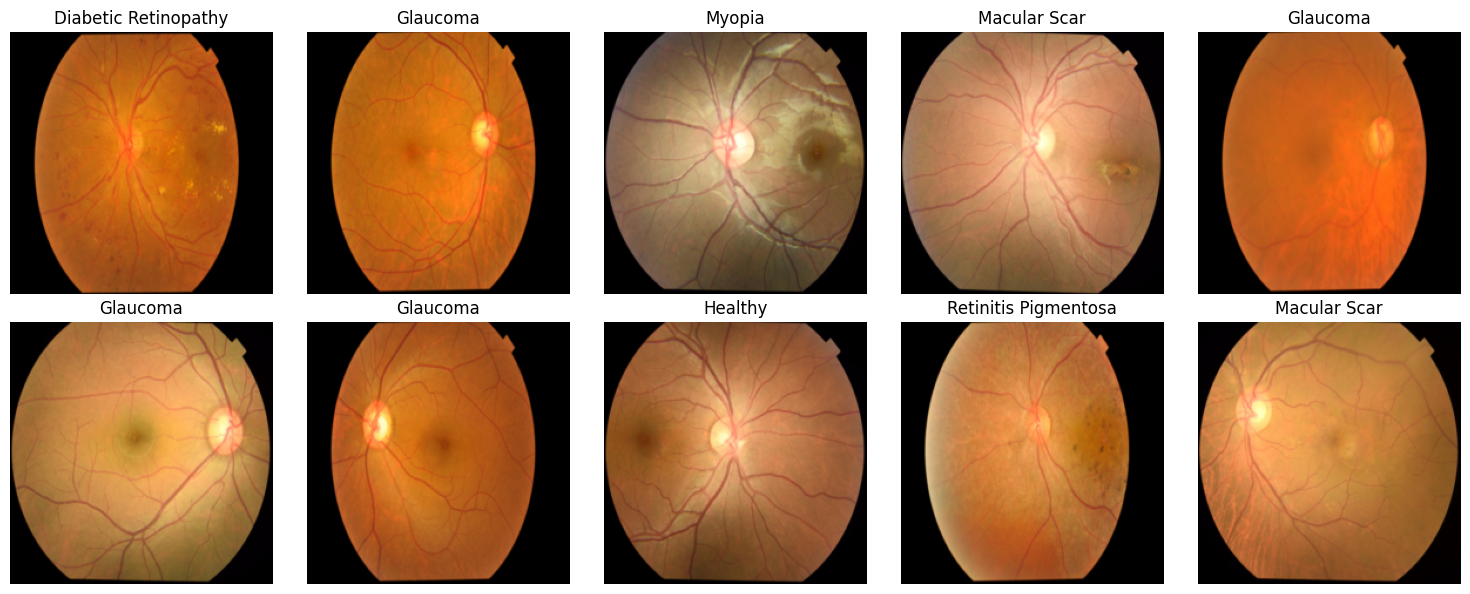

In [10]:
from visualization import visualize_images

# Example usage in notebook:
images, targets = next(iter(dataloader))
visualize_images.show_image_batch(images, targets, classes, num_images=10, rows=2, cols=5)